In [18]:
%pylab inline
import numpy as np
import numpy.random as rand
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import random as rng
import seaborn as sns
import pickle
import argparse
import pandas as pd 
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rand']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## RNN analysis

In [13]:
cd /home/lansdell/projects/synthfeedback/

/home/lansdell/projects/synthfeedback


In [24]:
methods = ['backprop', 'nodepert', 'feedbackalignment']
#methods = ['nodepert', 'feedbackalignment']
learning_rate = 5e-6
lmbda = 5e-5
var_xi = 0.5

losses = {}
alignments = {}
n_in_epoch = {}
params = {}

#Load the results
for method in methods:
    fn_in = './experiments/rnn_np_copytask/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
    p_in = open(fn_in,"rb")
    losses[method] = np.array(pickle.load(p_in))
    alignments[method] = np.array(pickle.load(p_in))
    n_in_epoch[method] = pickle.load(p_in)
    params[method] = pickle.load(p_in)

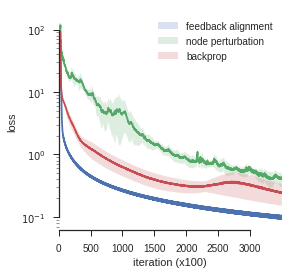

In [29]:
#Make plot of loss for each method
fig, axes = plt.subplots(1,1,figsize = (4,4))

sns.tsplot(losses['backprop'], color = 'C0')
sns.tsplot(losses['feedbackalignment'], color = 'C1')
sns.tsplot(losses['nodepert'], color = 'C2')
plt.legend(['feedback alignment', 'node perturbation', 'backprop'])
plt.xlabel('iteration (x100)')
plt.ylabel('loss')
axes.set_yscale('log')
sns.despine(trim = True)
plt.savefig('./figures/rnn_copytask_conv_rerun.pdf')